In [1]:
# code adapted from https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33#:~:text=The%20Keras%20ResNet%20got%20to,to%20do%20with%20weight%20initializations.
# import plaidml
# import plaidml.keras
# plaidml.install_backend()
# import os
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
NUM_SAMP = 1000
import random
random.seed(10)

from PIL import Image
from glob import glob

# Clean Script
from glob import glob
import tensorflow as tf

from tensorflow.keras.utils import load_img

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential,Model,load_model

# Collect paths to images based on label
nonCancerPaths = glob('imagedata/*/0/*.png')
cancerousPaths = glob('imagedata/*/1/*.png')

# Turn filepaths into image arrays to train a model
def paths_to_image(paths, label, num_samples):
    images = []
    labels = []
    for path in paths[0:num_samples]:
        image = load_img(path)
        image = image.resize([50, 50])
        imgArray = tf.keras.utils.img_to_array(image)
        images.append(imgArray)
        labels.append(label)
    return [images[0: num_samples], labels[0: num_samples]]
nonCancerImages = paths_to_image(nonCancerPaths, 0, NUM_SAMP)
cancerImages = paths_to_image(cancerousPaths, 1, NUM_SAMP)







2023-03-11 16:15:16.550317: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
allImages = nonCancerImages[0] + cancerImages[0]
allLabels = nonCancerImages[1] + cancerImages[1]

x_train, x_test, y_train, y_test = train_test_split(allImages, allLabels, test_size=.20, stratify= allLabels, random_state = 10)
x_train = tf.keras.applications.vgg16.preprocess_input(np.array(x_train))
x_test = tf.keras.applications.vgg16.preprocess_input(np.array(x_test))

print(np.array(x_train).shape)
print(np.array(y_train).shape)




(1600, 50, 50, 3)
(1600,)


2023-03-11 16:15:21.942953: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


FITTING
Epoch 1/10
50/50 [==============================] - 46s 891ms/step - loss: 0.6664 - accuracy: 0.6181 - val_loss: 0.5498 - val_accuracy: 0.7775
Epoch 2/10
50/50 [==============================] - 49s 982ms/step - loss: 0.5430 - accuracy: 0.7206 - val_loss: 0.5362 - val_accuracy: 0.8125
Epoch 3/10
50/50 [==============================] - 48s 957ms/step - loss: 0.4232 - accuracy: 0.8281 - val_loss: 0.3945 - val_accuracy: 0.8725
Epoch 4/10
50/50 [==============================] - 50s 1s/step - loss: 0.3972 - accuracy: 0.8325 - val_loss: 0.3312 - val_accuracy: 0.8725
Epoch 5/10
50/50 [==============================] - 48s 958ms/step - loss: 0.3655 - accuracy: 0.8500 - val_loss: 0.3497 - val_accuracy: 0.8425
Epoch 6/10
50/50 [==============================] - 49s 985ms/step - loss: 0.3251 - accuracy: 0.8775 - val_loss: 0.3519 - val_accuracy: 0.8700
Epoch 7/10
50/50 [==============================] - 47s 938ms/step - loss: 0.3048 - accuracy: 0.8944 - val_loss: 0.3127 - val_accuracy: 0

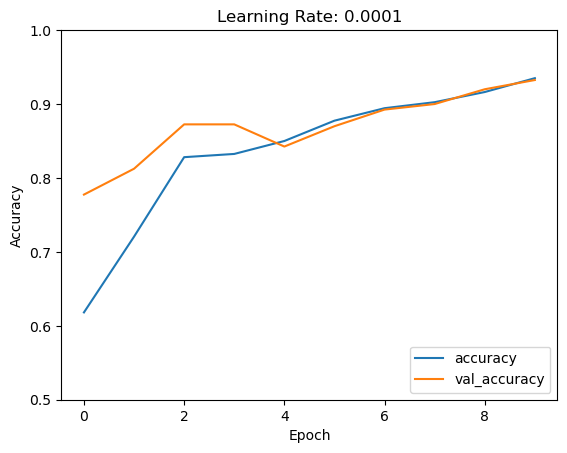

FITTING
Epoch 1/10
50/50 [==============================] - 47s 931ms/step - loss: 0.9750 - accuracy: 0.5238 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 46s 925ms/step - loss: 0.7097 - accuracy: 0.5400 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 3/10
50/50 [==============================] - 47s 942ms/step - loss: 0.6854 - accuracy: 0.5356 - val_loss: 0.7019 - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - 52s 1s/step - loss: 0.6940 - accuracy: 0.5225 - val_loss: 0.6838 - val_accuracy: 0.5000
Epoch 5/10
50/50 [==============================] - 49s 979ms/step - loss: 0.6818 - accuracy: 0.5700 - val_loss: 0.6392 - val_accuracy: 0.8000
Epoch 6/10
50/50 [==============================] - 49s 975ms/step - loss: 0.6699 - accuracy: 0.5725 - val_loss: 0.6835 - val_accuracy: 0.5000
Epoch 7/10
50/50 [==============================] - 49s 982ms/step - loss: 0.6441 - accuracy: 0.6281 - val_loss: 0.5281 - val_accuracy: 0

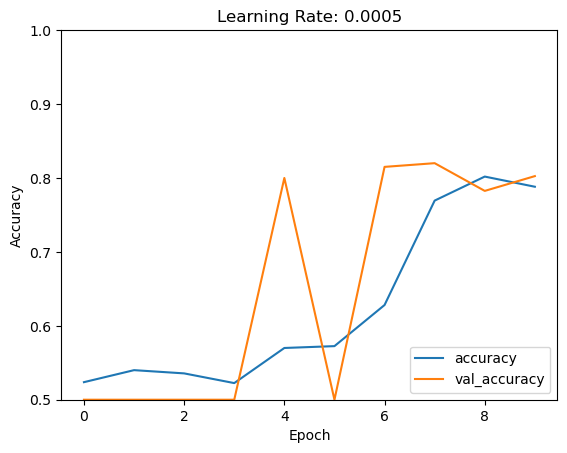

FITTING
Epoch 1/10
50/50 [==============================] - 48s 949ms/step - loss: 5.8885 - accuracy: 0.5906 - val_loss: 0.6744 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 47s 946ms/step - loss: 0.6818 - accuracy: 0.5625 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
50/50 [==============================] - 46s 927ms/step - loss: 0.6944 - accuracy: 0.4906 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - 48s 965ms/step - loss: 0.6934 - accuracy: 0.4969 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/10
50/50 [==============================] - 48s 964ms/step - loss: 0.6905 - accuracy: 0.5481 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 6/10
50/50 [==============================] - 47s 947ms/step - loss: 1.4739 - accuracy: 0.5856 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 7/10
50/50 [==============================] - 47s 936ms/step - loss: 0.6976 - accuracy: 0.5300 - val_loss: 3.0392 - val_accuracy

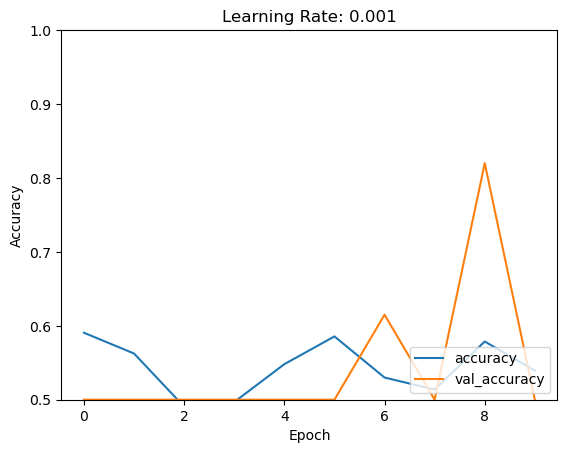

FITTING
Epoch 1/10
50/50 [==============================] - 47s 921ms/step - loss: 133618.5938 - accuracy: 0.4981 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 46s 917ms/step - loss: 0.6951 - accuracy: 0.5138 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
50/50 [==============================] - 50s 1s/step - loss: 0.6944 - accuracy: 0.4850 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - 49s 978ms/step - loss: 0.6936 - accuracy: 0.4812 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/10
50/50 [==============================] - 51s 1s/step - loss: 0.6934 - accuracy: 0.4875 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
50/50 [==============================] - 46s 924ms/step - loss: 0.6935 - accuracy: 0.4800 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
50/50 [==============================] - 48s 969ms/step - loss: 0.6934 - accuracy: 0.4825 - val_loss: 0.6932 - val_accuracy:

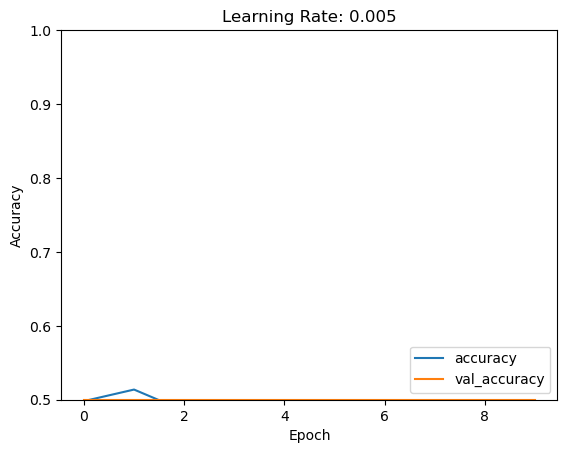

FITTING
Epoch 1/10
50/50 [==============================] - 146s 3s/step - loss: 2516028160.0000 - accuracy: 0.4944 - val_loss: 486.9892 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 142s 3s/step - loss: 17686236.0000 - accuracy: 0.4938 - val_loss: 648292.3750 - val_accuracy: 0.5000
Epoch 3/10
50/50 [==============================] - 145s 3s/step - loss: 242542.7812 - accuracy: 0.5000 - val_loss: 0.7572 - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - 140s 3s/step - loss: 6.2808 - accuracy: 0.4963 - val_loss: 0.6992 - val_accuracy: 0.5000
Epoch 5/10
50/50 [==============================] - 140s 3s/step - loss: 0.7001 - accuracy: 0.4938 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/10
50/50 [==============================] - 139s 3s/step - loss: 0.7015 - accuracy: 0.4863 - val_loss: 0.6997 - val_accuracy: 0.5000
Epoch 7/10
50/50 [==============================] - 150s 3s/step - loss: 0.6953 - accuracy: 0.5025 - val_loss: 0.6945 

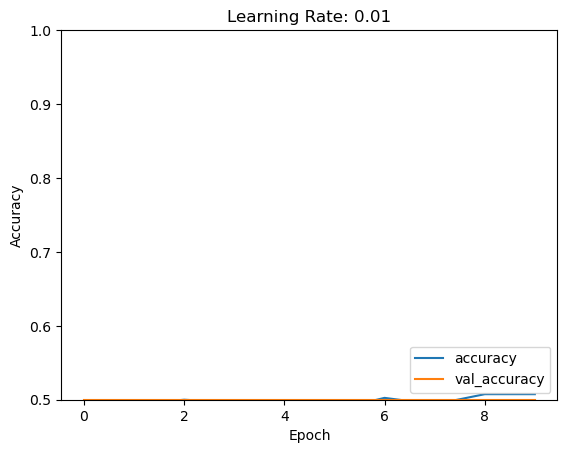

FITTING
Epoch 1/10
50/50 [==============================] - 50s 984ms/step - loss: nan - accuracy: 0.4988 - val_loss: nan - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 47s 936ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/10
50/50 [==============================] - 47s 945ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - 47s 939ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 5/10
50/50 [==============================] - 45s 906ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 6/10
50/50 [==============================] - 45s 910ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 7/10
50/50 [==============================] - 50s 999ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 8/10
50/50 [===============

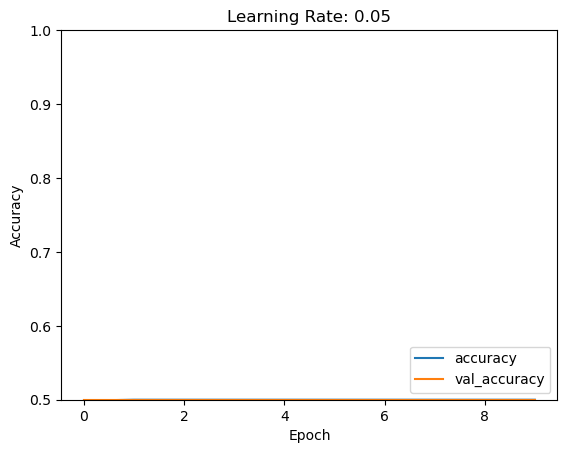

FITTING
Epoch 1/10
50/50 [==============================] - 49s 955ms/step - loss: nan - accuracy: 0.5075 - val_loss: nan - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 51s 1s/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/10
50/50 [==============================] - 47s 934ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - 48s 961ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 5/10
50/50 [==============================] - 48s 966ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 6/10
50/50 [==============================] - 50s 998ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 7/10
50/50 [==============================] - 48s 971ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 8/10
50/50 [==================

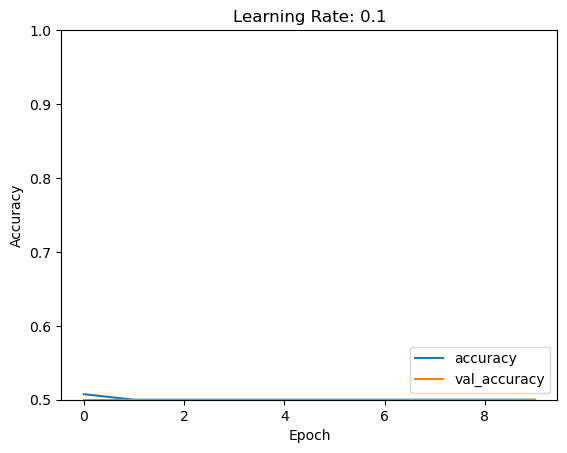

In [3]:
from keras.optimizers import SGD, Adam

#Learning rates above .01 are not useful

learning_rates = [.0001, .0005, .001, .005, .01, .05, .1]

for lr in learning_rates:
    model = VGG16(weights=None, include_top=True, input_shape= (50, 50,3), classes=2, classifier_activation='softmax')
    adam = Adam(learning_rate=lr)
    model.compile(optimizer= adam, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

    print("FITTING")
    history = model.fit(np.array(x_train), np.array(y_train), epochs=10, validation_data=(np.array(x_test), np.array(y_test)))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.title("Learning Rate: " + str(lr))
    plt.show()







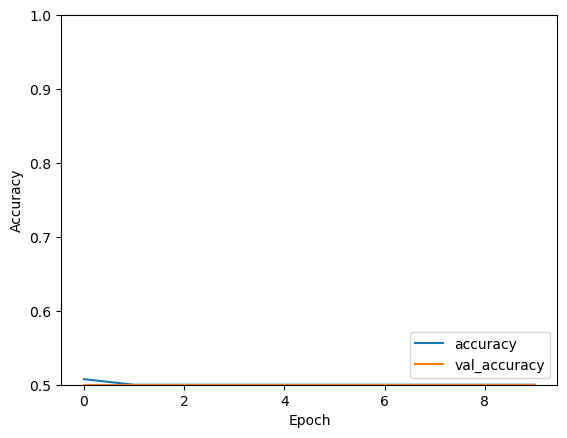

In [4]:
# LR = .0001 achieves the highest validation accuracy
# Increase number of epochs to see if more epochs further increases val error



In [5]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     